## 基于sklearn的线性回归模型

本文通过例子介绍`sklearn`库中的回归模型。

### 准备数据

为了便于直观绘图，我们选择只有一个特征的线性样本。预测值 $y$ 和特征 $x$ 的关系如下：

$$ y = 3x + 4 + 噪音 $$

如果不考虑噪音，通过线性回归，应该得到：$\theta_0=4，\theta_1=3$。

下面画出所有样本点 $(x^{i}, y^{i})$：

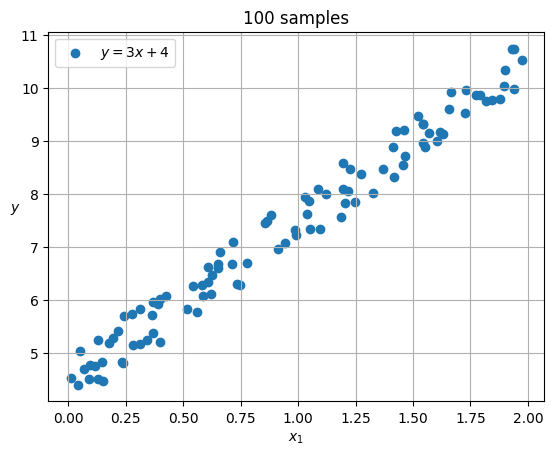

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)

# 100个训练数据
X1_train = 2 * np.random.rand(100, 1)
y_train = 4 + 3 * X1_train + np.random.rand(100, 1)
X_train = X_b = add_dummy_feature(X1_train) # 给特征值添加x0维度

# 2个测试数据
X1_test = np.array([[0], [2]])
X_test = add_dummy_feature(X1_test)

fig, ax = plt.subplots()
ax.scatter(X_train[:,1], y_train, label='$y=3x+4$')
ax.set_title("100 samples")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$", rotation=0)
ax.legend()
ax.grid()

### 正规方程算法

`sklearn`中的`LinearRegression`提供了正规方程解法的线性回归模型。

[4.51359766] [[0.         2.98323418]]


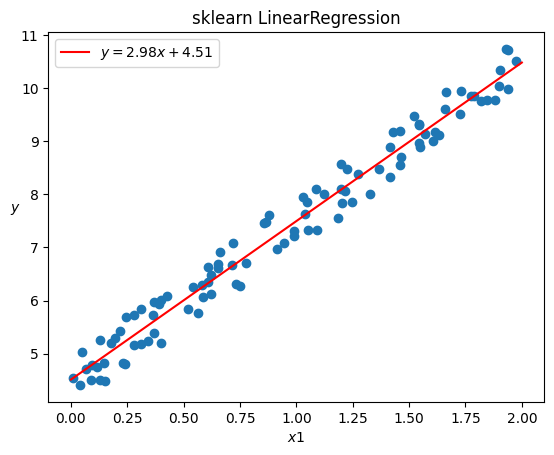

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.intercept_, lin_reg.coef_)
theta1 = round(lin_reg.coef_[0][1], 2)
theta0 = round(lin_reg.intercept_[0], 2)

# 输入要保证是二维的，一行表示一个样本点
y_pred = lin_reg.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_train[:,1], y_train)
ax.plot(X_test[:,1], y_pred, 'r-', label=f'$y={theta1}x+{theta0}$')

ax.set_title("sklearn LinearRegression")
ax.set_xlabel("$x1$")
ax.set_ylabel("$y$", rotation=0)
ax.legend()

### 随机梯度下降算法

`skLearn`中的`SGDRegressor`提供了线性回归的随机梯度下降算法。

[2.29156431] [2.29156431 3.01278416]


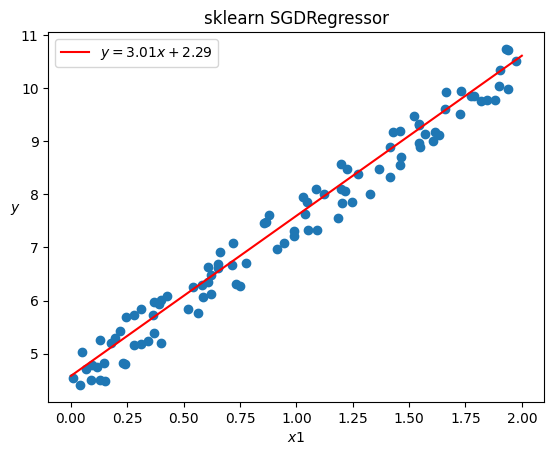

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
# y.shape: (100,1), y.ravel().shape: (100,)
sgd_reg.fit(X_train, y_train.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)
theta1 = round(sgd_reg.coef_[1], 2)
theta0 = round(sgd_reg.coef_[0], 2)

# 输入要保证是二维的，一行表示一个样本点
y_pred = sgd_reg.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(X_train[:,1], y_train)
ax.plot(X_test[:,1], y_pred, 'r-', label=f'$y={theta1}x+{theta0}$')

ax.set_title("sklearn SGDRegressor")
ax.set_xlabel("$x1$")
ax.set_ylabel("$y$", rotation=0)
ax.legend()